In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import wrangle as w 

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

# 1. Load your zillow dataset.

In [2]:
train, validate, test = w.split_clean_zillow()

train: (1278128, 7)
validate: (426043, 7)
test: (426043, 7)


# 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

## Here is some sample code to get you started:

```from sklearn.linear_model import LinearRegression```

```#assuming X and y are already defined```

```model = LinearRegression().fit(X, y)```

```predictions = model.predict(X)```

## Modify and add to the code above as necessary for it to work with the zillow dataset.

In [3]:
#drop extra columns
train = train.drop(columns=['bedrooms','bathrooms',
                    'year_built','sale_tax', 'fips'])

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
# create the scaler and fit/transform my square footage column
mms = MinMaxScaler()

train['sqft'] = mms.fit_transform(train[['sqft']])

In [6]:
train.head()

,sqft,home_value
107815,0.001553,239760.0
304808,0.003004,1791635.0
2036858,0.001881,223027.0
802962,0.001668,422110.0
1662966,0.002042,434229.0


In [7]:
train.sqft.min()

0.0

In [8]:
train.sqft.max()

1.0

In [9]:
#split into my X_train and y_train
X_train = train[['sqft']]
y_train = train.home_value

X_validate = validate[['sqft']]
y_validate = validate.home_value

X_test = test[['sqft']]
y_test = test.home_value

In [10]:
X_train.head()

,sqft
107815,0.001553
304808,0.003004
2036858,0.001881
802962,0.001668
1662966,0.002042


In [11]:
y_train.head()

107815      239760.0
304808     1791635.0
2036858     223027.0
802962      422110.0
1662966     434229.0
Name: home_value, dtype: float64

In [12]:
#make my ols model
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_train)

In [13]:
predictions

array([368351.35340969, 703991.8530067 , 444313.375372  , ...,
       416889.38661244, 291903.95111537, 957360.38632505])

In [14]:
#save predictions into train df
train['yhat'] = predictions

## 3. Plot the residuals for the linear regression model that you made.

In [15]:
#calculate residuals (acutal - prediction)
train['residuals'] = train.home_value - train.yhat

In [16]:
train.head()

,sqft,home_value,yhat,residuals
107815,0.001553,239760.0,368351.353410,-1.285914e+05
304808,0.003004,1791635.0,703991.853007,1.087643e+06
2036858,0.001881,223027.0,444313.375372,-2.212864e+05
802962,0.001668,422110.0,395047.271671,2.706273e+04
1662966,0.002042,434229.0,481444.970772,-4.721597e+04


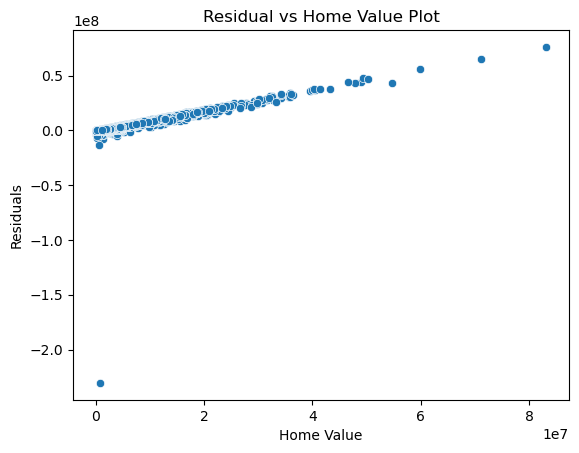

In [17]:
#make scatterplot of y-value vs residuals
sns.scatterplot(data=train, x='home_value', y='residuals')

plt.xlabel('Home Value')
plt.ylabel('Residuals')
plt.title('Residual vs Home Value Plot')
plt.show()


## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [18]:
from sklearn.metrics import mean_squared_error

## MSE - mean squared error

In [19]:
MSE = mean_squared_error(train.home_value, train.yhat)
MSE

357135154606.70276

## SSE - sum or squared errors

In [20]:
SSE = MSE * len(train)
SSE

4.564644408871558e+17

## RMSE - root mean squared eror

In [21]:
RMSE = MSE**.5
RMSE

597607.8602283463

## ESS - explained sum of squares

In [22]:
ESS = ((train.yhat - train.home_value.mean())**2).sum()
ESS

1.2420977181316771e+17

## TSS - total sum of squares

In [23]:
TSS = ESS + SSE
TSS

5.806742127003235e+17

## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [24]:
train['baseline'] = train.home_value.mean()

In [25]:
train.head()

,sqft,home_value,yhat,residuals,baseline
107815,0.001553,239760.0,368351.353410,-1.285914e+05,461552.518428
304808,0.003004,1791635.0,703991.853007,1.087643e+06,461552.518428
2036858,0.001881,223027.0,444313.375372,-2.212864e+05,461552.518428
802962,0.001668,422110.0,395047.271671,2.706273e+04,461552.518428
1662966,0.002042,434229.0,481444.970772,-4.721597e+04,461552.518428


## MSE

In [26]:
MSE_baseline = mean_squared_error(train.home_value, train.baseline)
MSE_baseline

454316166065.21375

## SSE

In [27]:
SSE_baseline = MSE_baseline * len(train)
SSE_baseline

5.806742127005996e+17

## RSME

In [28]:
RMSE_baseline = MSE_baseline**.5
RMSE_baseline

674029.7961256711

## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [29]:
if SSE < SSE_baseline:
    print('My OSL model performs better than baseline')
else:
    print('My OSL model performs worse than baseline. :( )')

    

My OSL model performs better than baseline


## 7. What is the amount of variance explained in your model?

In [30]:
#manually
R2 = ESS / TSS
R2

0.21390612687198898

In [31]:
from sklearn.metrics import r2_score

In [32]:
#from sklearn
r2_score(train.home_value, train.yhat)

0.21390612687236266

## 8. Is your model better than the baseline model?

In [33]:
RMSE_baseline - RMSE

76421.93589732482

it is better, but its still pretty bad and we probably don't want to use it

## 9.Create a file named evaluate.py that contains the following functions.

 * plot_residuals(y, yhat): creates a residual plot
 * regression_errors(y, yhat): returns the following values:
    + sum of squared errors (SSE)
    + explained sum of squares (ESS)
    + total sum of squares (TSS)
    + mean squared error (MSE)
 * root mean squared error (RMSE)
 * baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
 * better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [34]:
def plot_residuals(y, yhat):
    residuals = y - yhat
    
    plt.scatter(x=y, y=residuals)
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')
    plt.show()

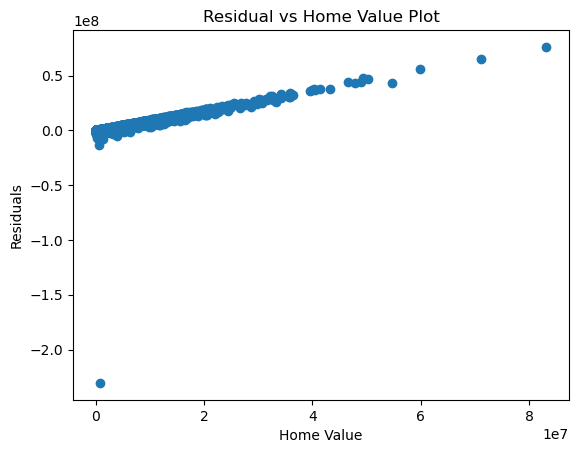

In [35]:
plot_residuals(train.home_value, train.yhat)

In [36]:
def regression_errors(y, yhat):
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    ESS = ((yhat - y.mean())**2).sum()
    TSS = ESS + SSE
    
    return SSE, ESS, TSS, MSE, RMSE

In [37]:
regression_errors(train.home_value, train.yhat)

(4.564644408871558e+17,
 1.2420977181316771e+17,
 5.806742127003235e+17,
 357135154606.70276,
 597607.8602283463)

In [42]:
def baseline_mean_errors(y):
    baseline = np.repeat(y.mean(), len(y))
    
    MSE = mean_squared_error(y, baseline)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    return SSE, MSE, RMSE

In [44]:
baseline_mean_errors(train.home_value)

(5.806742127005996e+17, 454316166065.21375, 674029.7961256711)

In [45]:
def better_than_baseline(y, yhat):
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    
    if SSE < SSE_baseline:
        print('My OSL model performs better than baseline')
    else:
        print('My OSL model performs worse than baseline. :( )')

In [46]:
better_than_baseline(train.home_value, train.yhat)

My OSL model performs better than baseline
